In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Chandigarh.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,The Night Factory,1200,"North Indian,Chinese,Italian",Chandigarh,Chandigarh Industrial Area,none,24,Very Good,4.0,2074
1,Veera Da Dhaba,250,North Indian,Chandigarh,Phase 7-- Mohali,none,1pm to 4am(Mon-Sun),Good,3.7,40
2,Sector 7 Social,1400,"Continental,American,Asian,North Indian,Momos,...",Chandigarh,Sector 7-- Chandigarh,Lounge,9am to 12midnight(Mon-Sun),Excellent,4.7,2558
3,La Pino'z Pizza,500,"Pizza,Fast Food",Chandigarh,Inner market-- Sector 9 D-- Chandigarh,Quick Bites,11am to 12midnight(Mon-Sun),Very Good,4.2,1333
4,Katani Dhaba,450,"North Indian,Chinese",Chandigarh,Phase 3B2 Market-- Phase 3 Mohali,Casual Dining,8am to 1130pm(Mon-Sun),Very Good,4.1,1416


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 10 columns):
Name                1616 non-null object
Price               1616 non-null int64
Cuisine_Category    1616 non-null object
City                1616 non-null object
Region              1616 non-null object
Cuisine_Type        1616 non-null object
Timing              1614 non-null object
Rating_Types        1616 non-null object
Rating              1616 non-null float64
Votes               1616 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 126.3+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,1616.000000,1616.000000,1616.000000
mean,458.003713,3.429022,138.863861
std,326.065227,0.405450,244.656046
min,100.000000,2.200000,4.000000
25%,250.000000,3.100000,15.000000
50%,400.000000,3.400000,48.000000
75%,500.000000,3.700000,145.000000
max,3000.000000,4.900000,2558.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              2
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Punjabi Dhaba    5
Shama Dhaba      4
Sethi Dhaba      3
Food Plaza       3
Vyanjan          3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Kharar Road                   129
VIP Road                       69
Phase 5-- Mohali               57
Phase 7-- Mohali               54
Chandigarh Industrial Area     54
Manimajra                      47
Dhakoli                        45
Phase 10-- Mohali              43
Sector 22-- Chandigarh         42
Ambala Road                    41
Name: Region, dtype: int64

Text(0.5,1,'Region')

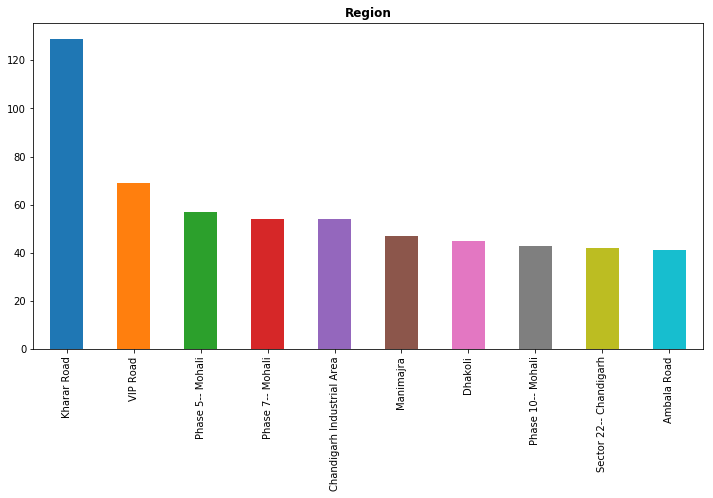

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

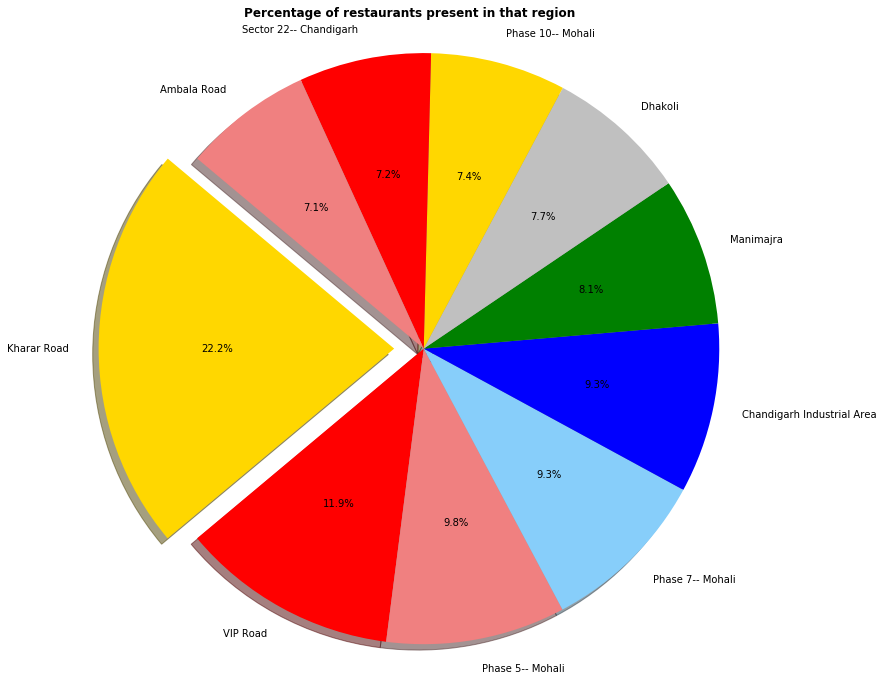

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      859
Good         578
Very Good    158
Excellent     10
Poor           5
Média          3
Bueno          1
Media          1
Bom            1
Name: Rating_Types, dtype: int64

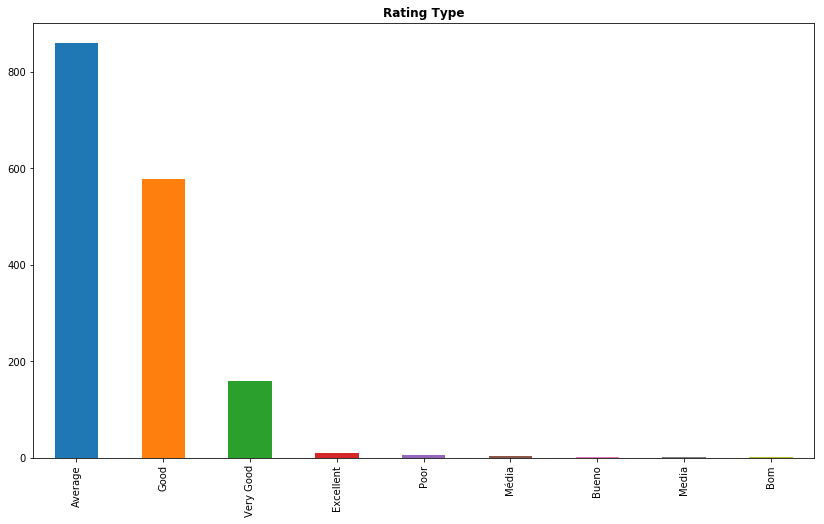

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       752
none              256
Casual Dining     221
Bakery             85
Dhaba              84
Café               50
Sweet Shop         48
Dessert Parlor     25
Beverage Shop      20
Food Truck         12
Name: Cuisine_Type, dtype: int64

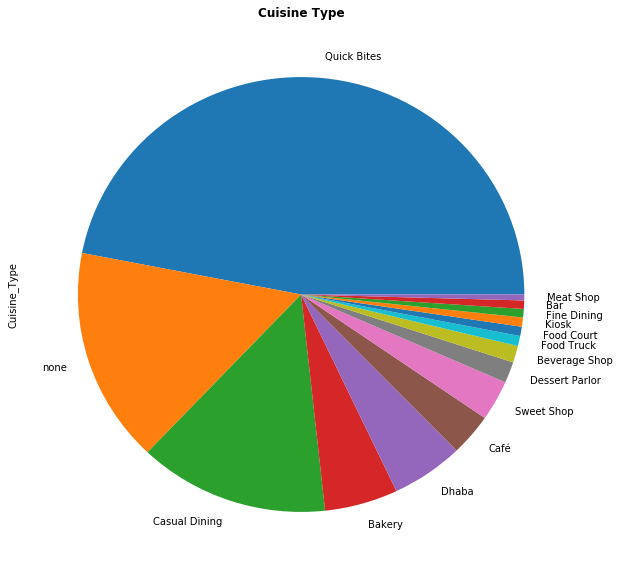

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)

data.dropna(how = 'any', inplace = True)

In [19]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.429615861214375


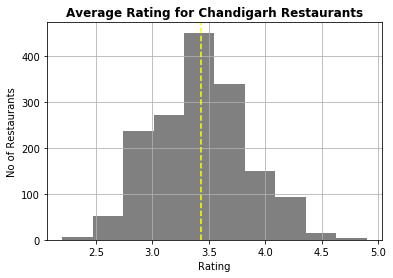

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Chandigarh Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Bhopal is found to be around 3.4

# Top cuisines in Chandigarh 

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

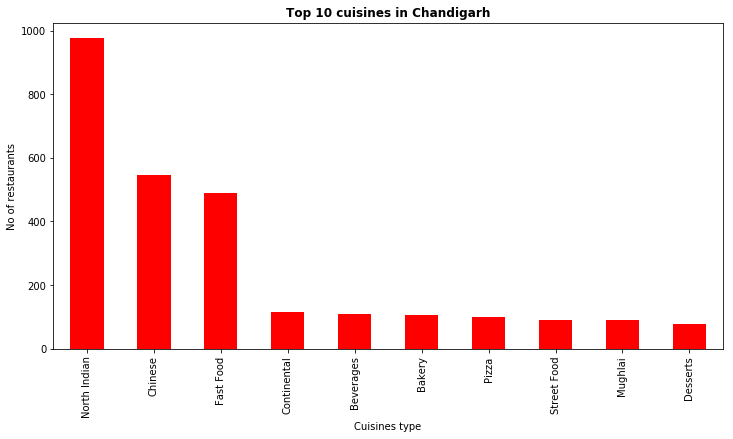

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Chandigarh',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

300     295
400     220
500     200
200     176
250     113
600     105
150      92
700      56
350      54
450      44
100      38
800      32
1000     28
1500     25
1200     22
650      20
550      19
900      13
1600     12
1300     10
Name: Price, dtype: int64

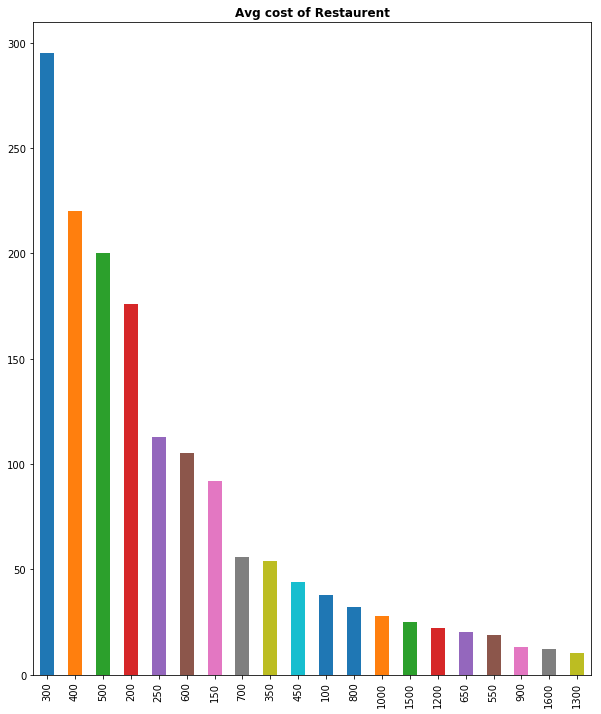

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

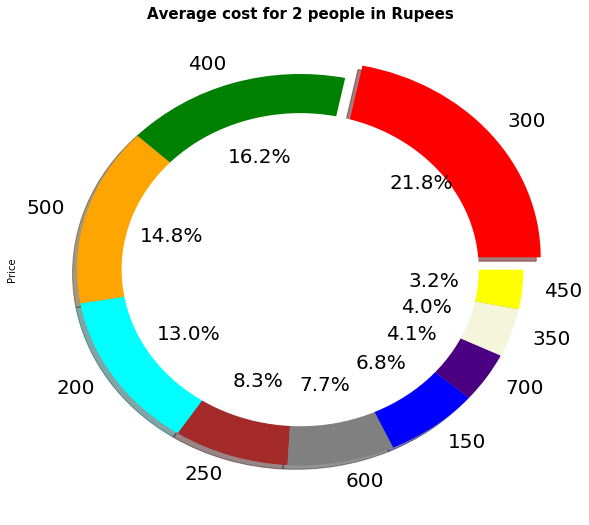

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300